In [1]:
import numpy as np

In [2]:
def log_loss(y_hat,y_ori):
    eps=1e-15
    """
    since we wonna take the log or two values which is 0,1 which is mathematically incorrect
    """
    y_hat=[max(i,eps) for i in y_hat]
    y_hatt=[min(i,1-eps) for i in y_hat]
    y_hatt=np.array([y_hatt])
    loss = -np.mean(y_ori*np.log(y_hatt) + (1-y_ori)*np.log(1-y_hatt))
    return loss

In [3]:
def sigmoid(y):
    return 1/(1+np.exp(-y))

In [4]:
import pandas as pd

In [6]:
df=pd.read_csv("C:\\Users\\user\\Desktop\\sultan\\insurance_data_gd.csv")
df.head(10)

,age,bought_insurance,Unnamed: 2,afford
0,22,0,NaN,1
1,25,0,NaN,0
2,47,1,NaN,1
3,52,0,NaN,0
4,46,1,NaN,1
5,56,1,NaN,1
6,55,0,NaN,0
7,60,1,NaN,0
8,62,1,NaN,1
9,61,1,NaN,1


In [42]:
cor=df.corr()

In [43]:
cor

,age,bought_insurance,Unnamed: 2,afford
age,1.000000,0.732229,NaN,0.171072
bought_insurance,0.732229,1.000000,NaN,0.352282
Unnamed: 2,NaN,NaN,NaN,NaN
afford,0.171072,0.352282,NaN,1.000000


In [7]:
X=df[['age','afford']]
X.head()

,age,afford
0,22,1
1,25,0
2,47,1
3,52,0
4,46,1


In [8]:
Y=df['bought_insurance']
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: bought_insurance, dtype: int64

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [10]:
scaler=MinMaxScaler()
x=scaler.fit_transform(X)

In [11]:
x=pd.DataFrame(x,columns=['age','afford'])
x.head()

,age,afford
0,0.090909,1.0
1,0.159091,0.0
2,0.659091,1.0
3,0.772727,0.0
4,0.636364,1.0


In [69]:
X_train,X_test,y_train,y_test=train_test_split(x,Y,test_size=0.2)

In [44]:
import matplotlib.pyplot as plt

In [70]:
def gradient(inpt,outpt,epoch,loss,function):
    alpha=0.5
    w1 = w2 =1
    bias=0
    n=len(inpt)
    print(f'{n}:training_examples,,w,total_epoch::{epoch}')
    X_train=inpt.copy()
    columns=X_train.columns
    losss=[]
    for e in range(epoch):
        weighted_sum= np.dot(w1,np.transpose(inpt['age'])) + np.dot(w2,np.transpose(inpt['afford'])) + bias
        y_hat=function(weighted_sum)
        los=loss(outpt,y_hat)
        #d1 ,d2 = np.dot(np.transpose(inpt),(y_hat-outpt))
        d1= np.dot(np.transpose(inpt['age']),(y_hat-outpt))
        d2= np.dot(np.transpose(inpt['afford']),(y_hat-outpt))
        bd = np.mean(y_hat-outpt)
        w1=w1 - alpha*d1
        w2 = w2-alpha*d2
        bias = bias -alpha*bd
        losss.append(los)
        if e%50==0:
          print(f'epoch=>{e}..w1={w1}..w2={w2}..bias={bias}..loss..{los}.')
    plt.plot(range(epoch),losss,'-r*')
          
        
        

22:training_examples,,w,total_epoch::1500
epoch=>0..w1=1.1879423737979418..w2=-0.5880302949316212..bias=-0.09969761613361255..loss..14.389276606873597.
epoch=>50..w1=5.088360670110004..w2=-0.23517278259729876..bias=-1.6514667084023875..loss..7.933794281544082.
epoch=>100..w1=5.691907688916693..w2=0.1881484319549802..bias=-2.3104150872448033..loss..7.189189533101543.
epoch=>150..w1=6.006884855422964..w2=0.4010618976918366..bias=-2.6449131041190777..loss..6.873521838857311.
epoch=>200..w1=6.186416532677046..w2=0.5208013008642424..bias=-2.8335369589141504..loss..6.713093822249843.
epoch=>250..w1=6.293848327665396..w2=0.5919155946632613..bias=-2.9457312407689074..loss..6.6233194519238845.
epoch=>300..w1=6.359907764298736..w2=0.6354396711722364..bias=-3.0144641017738696..loss..6.570313733827664.
epoch=>350..w1=6.401178306991082..w2=0.6625508022467516..bias=-3.057304870706612..loss..6.538019725269144.
epoch=>400..w1=6.427210780427953..w2=0.6796195336707282..bias=-3.0842878258929076..loss..6.

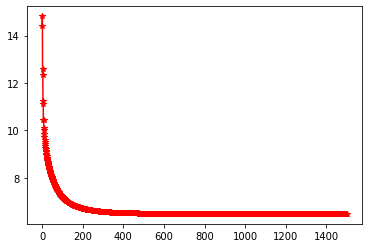

In [71]:
gradient(X_train,y_train,1500,log_loss,sigmoid)

In [72]:
X_test

,age,afford
3,0.772727,0.0
2,0.659091,1.0
21,0.181818,0.0
13,0.250000,0.0
17,0.909091,1.0
4,0.636364,1.0


In [73]:
weighted_sum= np.dot(5.845,np.transpose(X_test['age'])) + np.dot(2.332,np.transpose(X_test['afford'])) -4.538

In [74]:
s=sigmoid(weighted_sum)
s

array([0.49464793, 0.83840206, 0.03002404, 0.04407655, 0.95720664,
       0.81958605])

In [75]:
y_test

3     0
2     1
21    0
13    0
17    1
4     1
Name: bought_insurance, dtype: int64

In [23]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
model.coef_

array([[1.91489519, 0.8215183 ]])

In [130]:
a=np.dot(np.ones(2),np.transpose(x))
a

array([0.09090909, 0.15909091, 1.65909091, 0.77272727, 1.63636364,
       1.86363636, 0.84090909, 1.95454545, 2.        , 1.97727273,
       0.        , 0.22727273, 0.20454545, 0.25      , 1.70454545,
       1.84090909, 1.15909091, 1.90909091, 0.02272727, 0.        ,
       0.06818182, 0.18181818, 1.5       , 1.61363636, 1.72727273,
       1.81818182, 0.11363636, 0.63636364])

In [145]:
b=sigmoid(a)
b

array([0.52271163, 0.53968905, 0.84011593, 0.68411056, 0.83703953,
       0.86572023, 0.69865665, 0.87594143, 0.88079708, 0.87839013,
       0.5       , 0.55657487, 0.55095882, 0.5621765 , 0.84612747,
       0.86305619, 0.76116749, 0.87091698, 0.50568157, 0.5       ,
       0.51703885, 0.54532974, 0.81757448, 0.83391564, 0.84906324,
       0.86034782, 0.52837856, 0.65393099])

In [146]:
c=np.array([1,0,1])
d=np.array([0.9,0.2,1])

In [165]:
log_loss(b,Y)

ValueError: Length of passed values is 1, index implies 28.

In [39]:
a=np.array([1,2,3])
b=np.array([4,2,5])
c=np.dot(1,np.transpose(a)) + np.dot(1,np.transpose(b))
c

array([5, 4, 8])

In [132]:
np.ones(3)[2]

1.0